<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2021-08-05 04:11:51--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.2’

m4_survey_data.sqli 100%[===================>]  34.98M  26.2MB/s    in 1.3s    

2021-08-05 04:11:53 (26.2 MB/s) - ‘m4_survey_data.sqlite.2’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT *
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

DatabaseError: Execution failed on sql '
SELECT *
FROM master
': no such table: master

## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
QUERY = """
SELECT COUNT(*),DevType FROM DevType
GROUP BY DevType
ORDER BY COUNT(*) DESC
"""
df=pd.read_sql_query(QUERY,conn)
df

,COUNT(*),DevType
0,6928,"Developer, full-stack"
1,6290,"Developer, back-end"
2,3920,"Developer, front-end"
3,2575,"Developer, desktop or enterprise applications"
4,1959,"Developer, mobile"
5,1639,DevOps specialist
6,1413,Database administrator
7,1202,System administrator
8,988,Designer
9,911,"Developer, QA or test"


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


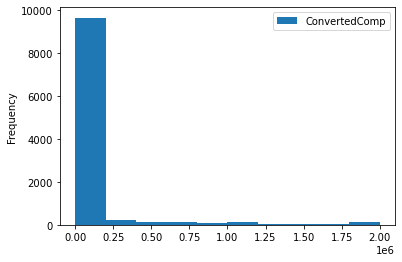

In [8]:
# your code goes here
QUERY="""
SELECT ConvertedComp from
master
"""
df1=pd.read_sql_query(QUERY,conn)
df1.plot(kind='hist')
plt.show()

### Box Plots


Plot a box plot of `Age.`


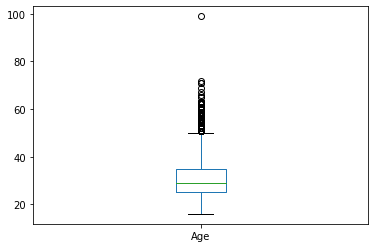

In [9]:
# your code goes here
QUERY="""
SELECT Age from master
"""
df2=pd.read_sql_query(QUERY,conn)
df2.plot(kind='box')
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


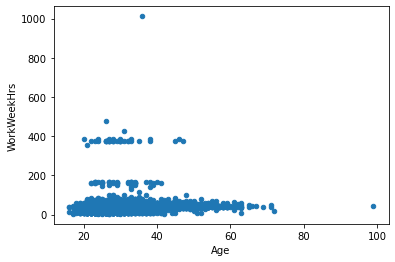

In [10]:
# your code goes here
QUERY="""
SELECT Age,WorkWeekHrs from master
"""
df3=pd.read_sql_query(QUERY,conn)
df3.plot(kind='scatter',x='Age',y='WorkWeekHrs')
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


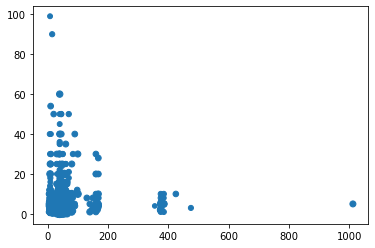

In [11]:
# your code goes here
QUERY="""
SELECT Age,WorkWeekHrs,CodeRevHrs from master
"""
df3=pd.read_sql_query(QUERY,conn)
plt.scatter(data=df3,x='WorkWeekHrs',y='CodeRevHrs',s='Age')

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [5]:
query="""
SELECT Count(*),LanguageWorkedWith FROM LanguageWorkedWith
group by LanguageWorkedWith
order by Count(*) Desc LIMIT 10


"""
df_=pd.read_sql_query(query,conn)
df_

DatabaseError: Execution failed on sql '
SELECT Count(*),LanguageWorkedWith FROM LanguageWorkedWith
group by LanguageWorkedWith
order by Count(*) Desc LIMIT 10


': no such table: LanguageWorkedWith

0       PostgreSQL
1          MongoDB
2            Redis
3            MySQL
4    Elasticsearch
Name: DatabaseDesireNextYear, dtype: object


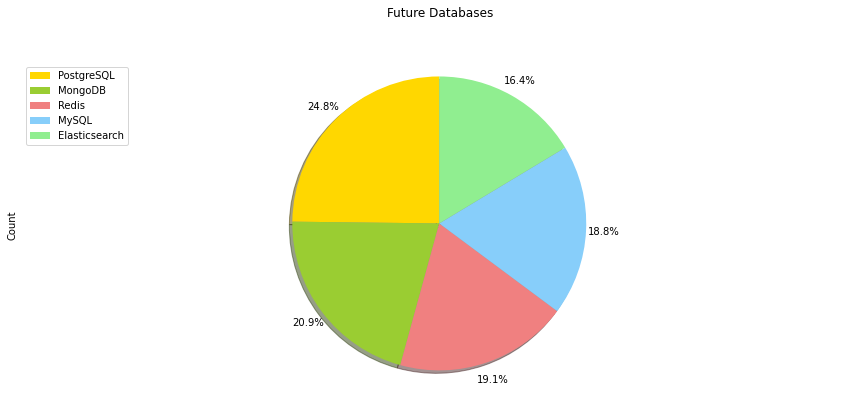

In [52]:
# your code goes here
query="""
SELECT DatabaseDesireNextYear,count(DatabaseDesireNextYear) as Count FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by count(DatabaseDesireNextYear) desc LIMIT 5

"""
df_pie=pd.read_sql_query(query,conn)
print(df_pie['DatabaseDesireNextYear'])
label=['PostgreSQL','MongoDB','Redis','MySQL','Elasticsearch']
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

df_pie['Count'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                             # 'explode' lowest 3 continents
                            )    
plt.title('Future Databases', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=label, loc='upper left') 

plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


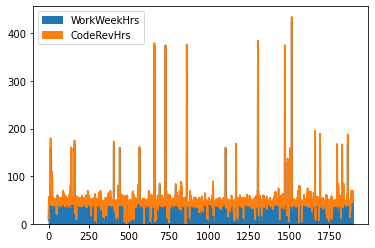

In [60]:
# your code goes here
query="""
SELECT WorkWeekHrs,CodeRevHrs FROM master
where Age>30 AND Age<35
"""
df_stack=pd.read_sql_query(query,conn)
df_stack.plot(kind='area',stacked=True)

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


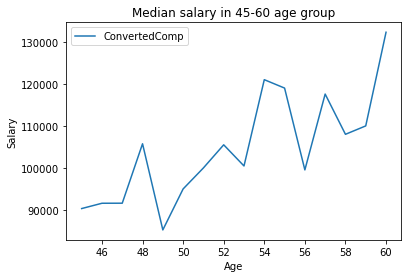

In [8]:
# your code goes here
QUERY = """
SELECT Age,ConvertedComp
FROM master
WHERE Age BETWEEN 45 AND 60
"""
df_ac = pd.read_sql_query(QUERY,conn)

df_gr=df_ac.groupby('Age').median()

df_gr.plot(kind='line')
plt.title('Median salary in 45-60 age group')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


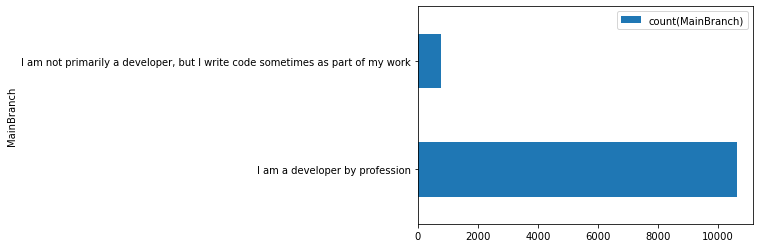

In [73]:
# your code goes here
query="""
SELECT count(MainBranch),MainBranch from master
GROUP BY MainBranch
"""
df_b=pd.read_sql_query(query,conn)
df_b.set_index('MainBranch',inplace=True)
df_b.plot(kind='barh')



Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01\&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264\&cm_mmca1=000026UJ\&cm_mmca2=10006555\&cm_mmca3=M12345678\&cvosrc=email.Newsletter.M12345678\&cvo_campaign=000026UJ).
